In [1]:
import h5py
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [3]:
drive.mount('/content/drive')
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5', 'r')
h5f.keys()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 32, 32)
(18000, 32, 32)
(42000,)
(18000,)


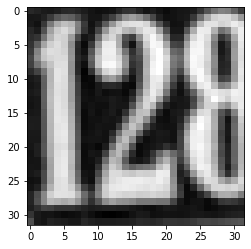

In [6]:
plt.imshow(X_train[0,:,:], cmap = 'gray')

In [7]:
y_train[0]

2

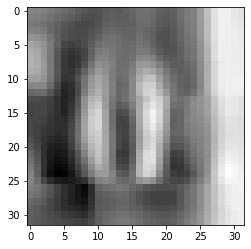

In [8]:
plt.imshow(X_train[100,:,:], cmap='gray')

In [9]:
y_train[100]

0

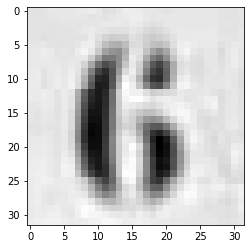

In [10]:
plt.imshow(X_train[1000,:,:], cmap='gray')

In [11]:
y_train[1000]

6

In [12]:
print(max(y_train), min(y_train))
print(max(y_test), min(y_test))

9 0
9 0


In [13]:
X_train = X_train.reshape([42000, 32*32])
X_test = X_test.reshape([18000, 32*32])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
print(y_train[0])
print(y_train[100])
print(y_train[1000])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train = X_train/255
X_test = X_test/255

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (1024,)))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3704 - accuracy: 0.5454
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3707 - accuracy: 0.5443
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3706 - accuracy: 0.5427
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3699 - accuracy: 0.5445
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3675 - accuracy: 0.5448
Epoch 6/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3736 - accuracy: 0.5450
Epoch 7/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3683 - accuracy: 0.5472
Epoch 8/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3681 - accuracy: 0.5452
Epoch 9/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3675 - accuracy: 0.5471
Epoch 10/100
1313/1313 [==============================] - 6s 4ms/step - l

In [23]:
model.evaluate(X_test, y_test, verbose=1)

563/563 [==============================] - 1s 2ms/step - loss: 1.3813 - accuracy: 0.5404


[1.381345510482788, 0.5404444336891174]